<a href="https://colab.research.google.com/github/Pathway2008/bank_churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/kaggle/Bank Churn/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/Bank Churn/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/kaggle/Bank Churn/sample_submission.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [16]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt

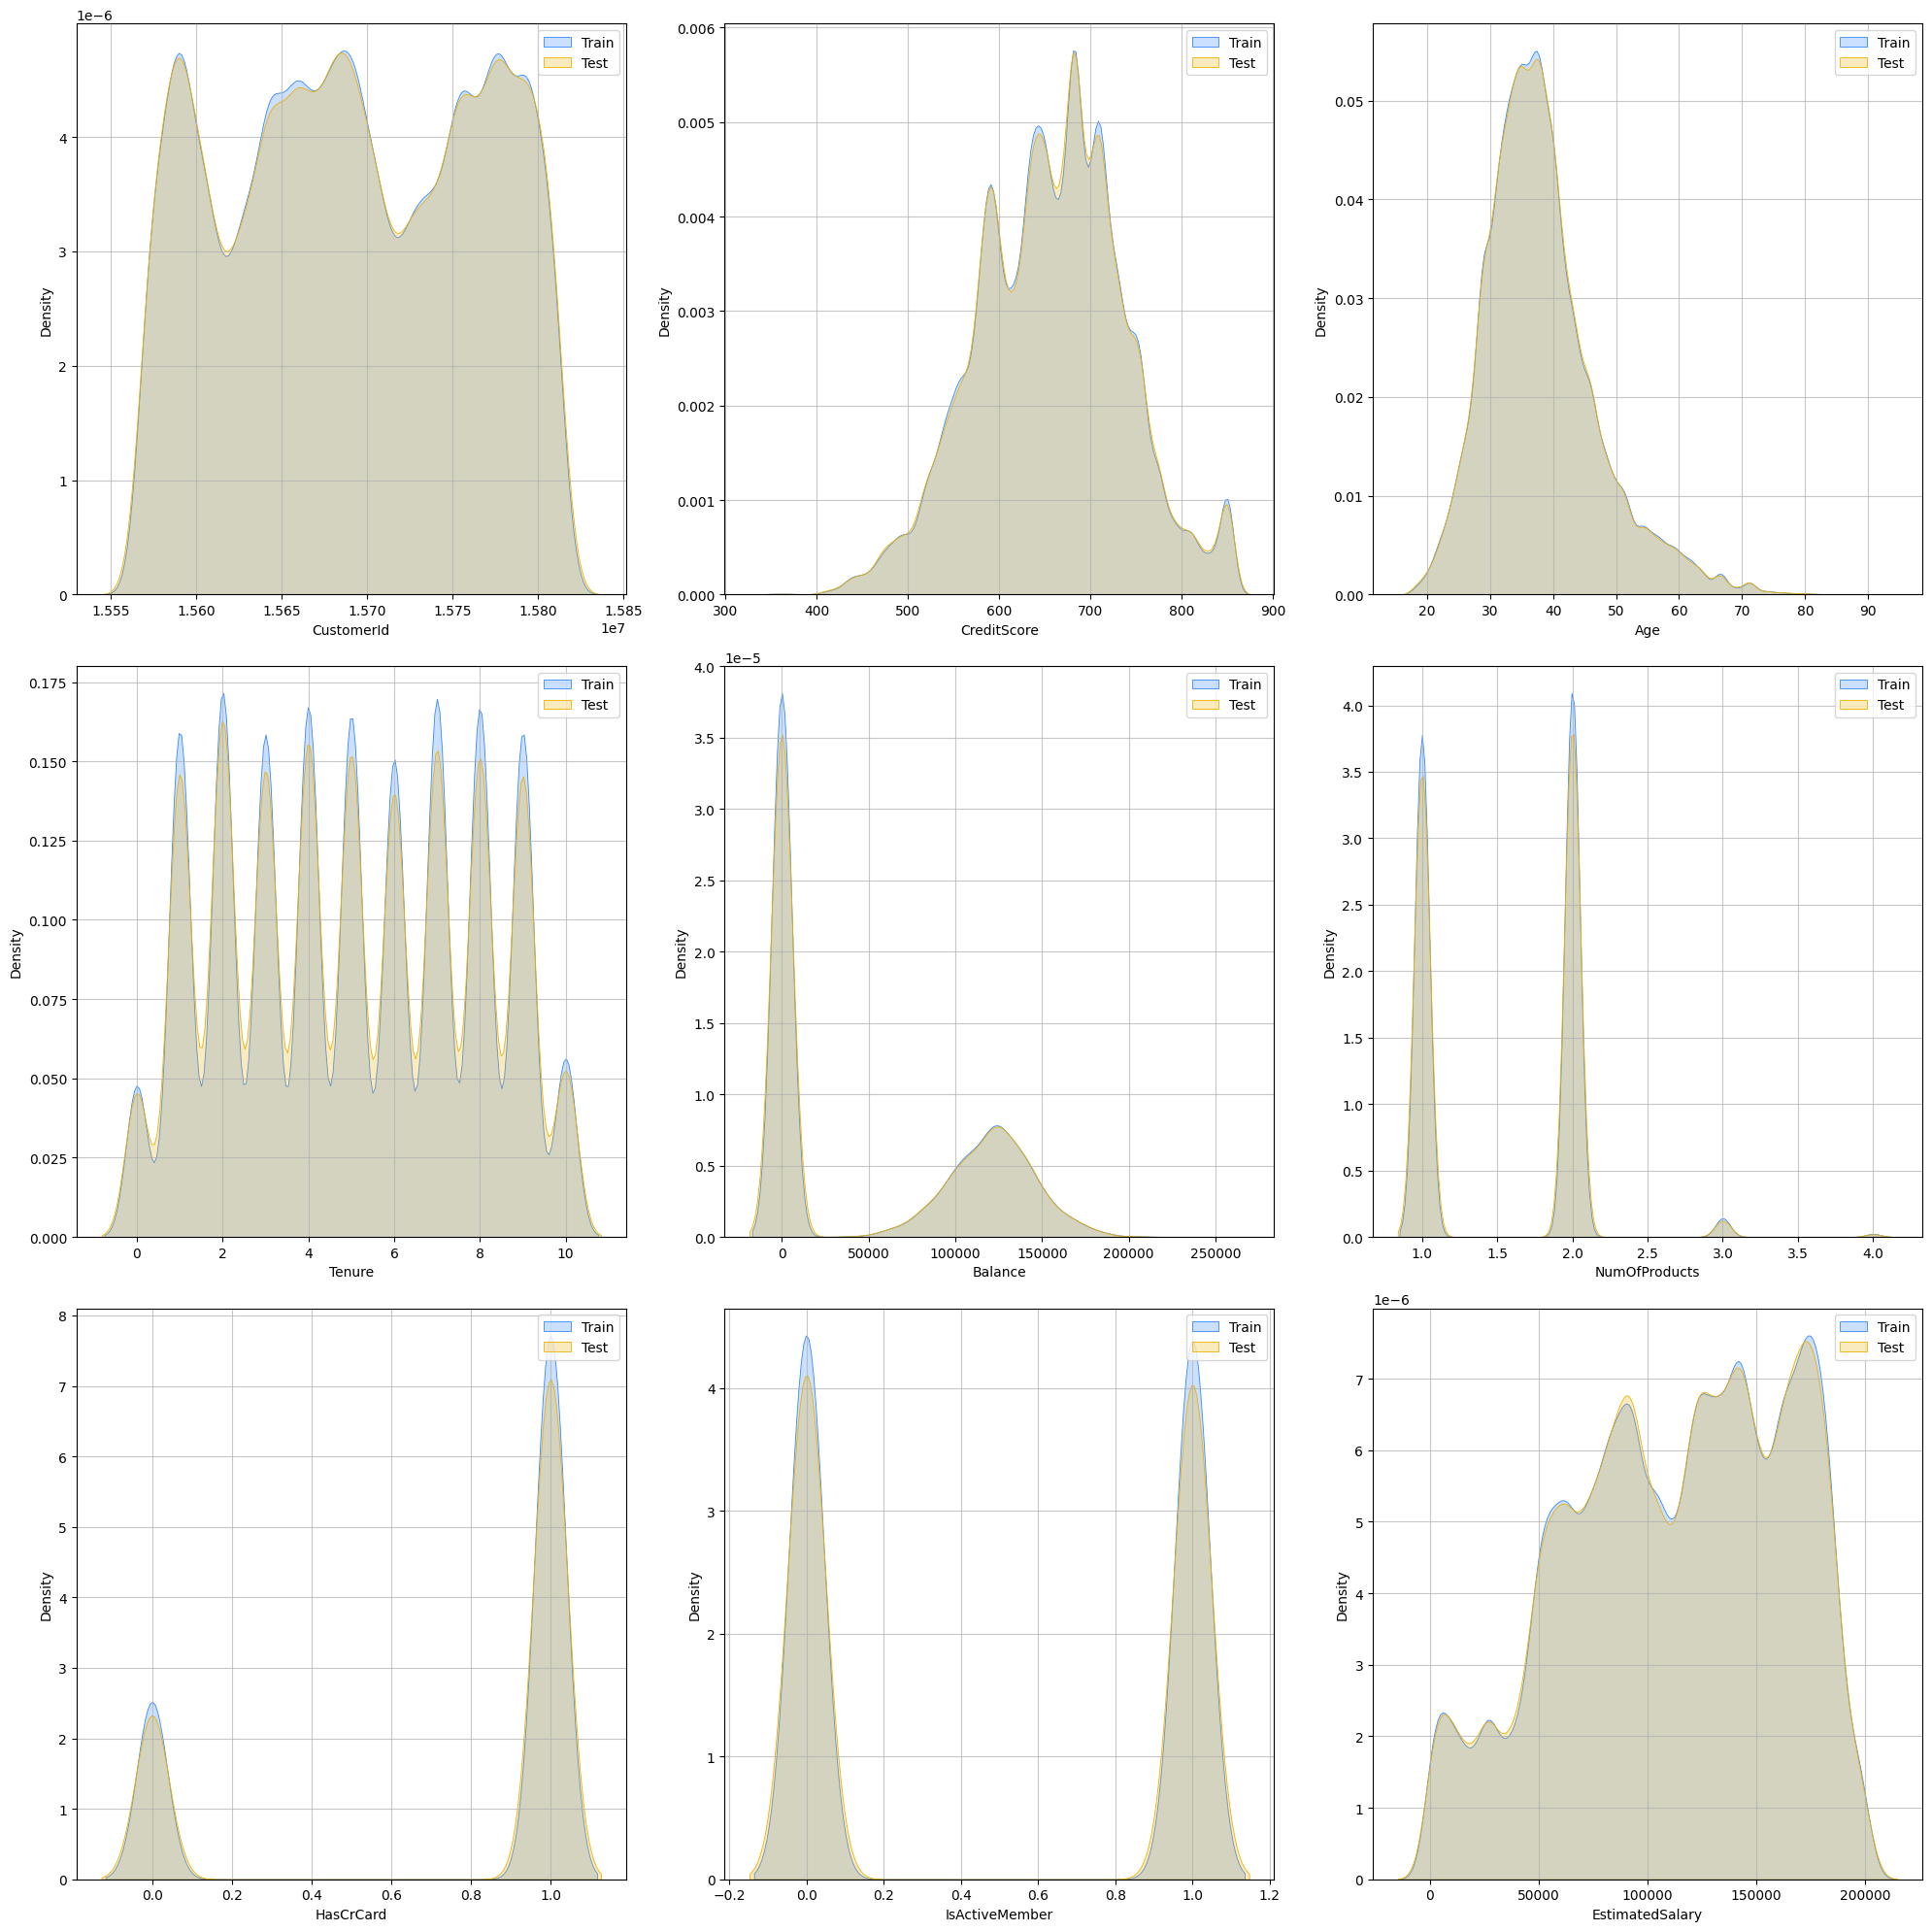

In [7]:
numeric_columns_train = train.drop(columns=['id','Exited']).select_dtypes(include='number')
numeric_columns_test = test.drop(columns=['id']).select_dtypes(include='number')

fig = plt.figure(figsize=(20, 20))
rows, cols = 3, 3

for idx, num in enumerate(numeric_columns_train.columns[:10]):
    ax = fig.add_subplot(rows, cols, idx + 1)
    ax.grid(alpha=0.7, axis="both")

    sns.kdeplot(x=num, fill=True, color="#3386FF", linewidth=0.6, data=train, label="Train")
    sns.kdeplot(x=num, fill=True, color="#EFB000", linewidth=0.6, data=numeric_columns_test, label="Test")

    ax.set_xlabel(num)
    ax.legend()

fig.tight_layout()
fig.show()


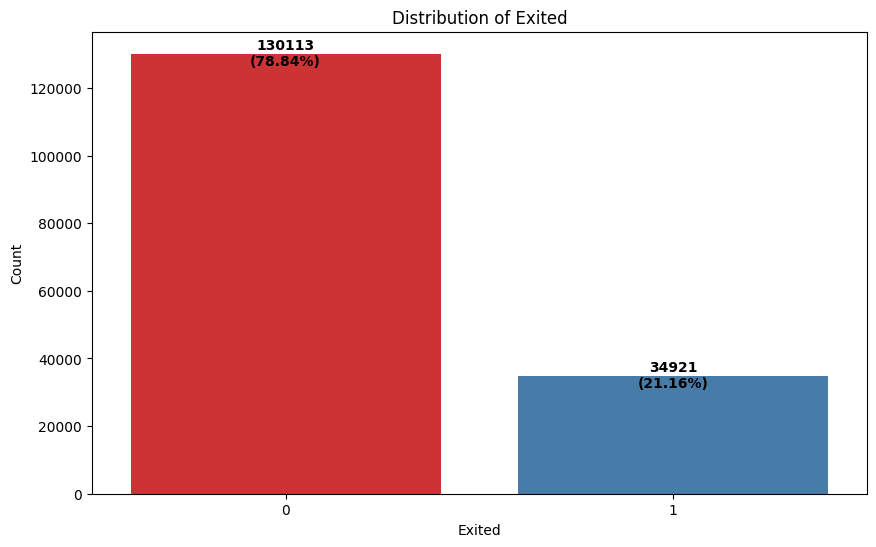

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))

value_counts = train['Exited'].value_counts()
total_samples = len(train)
percentage_values = (value_counts / total_samples) * 100

sns.countplot(x='Exited', data=train, palette='Set1', ax=ax)

for i, (count, percentage) in enumerate(zip(value_counts, percentage_values)):
    ax.text(i, count + 10, f'{count}\n({percentage:.2f}%)', ha='center', va='center', fontweight='bold')

ax.set_xlabel('Exited')
ax.set_ylabel('Count')
ax.set_title('Distribution of Exited')

plt.show()


In [53]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


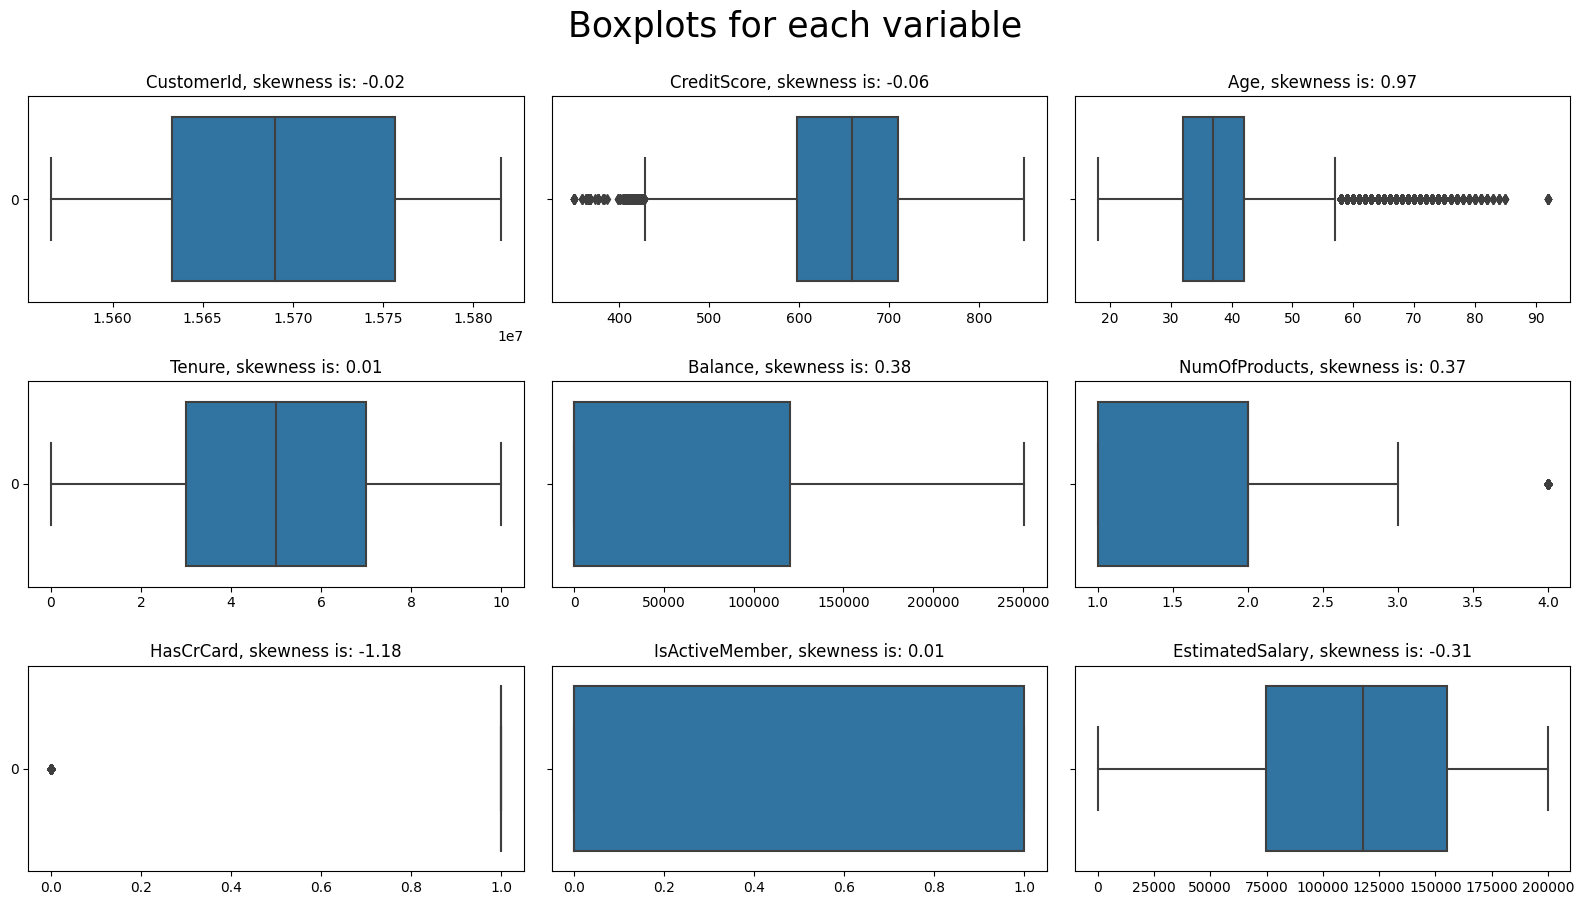

In [6]:
numeric_columns = train.drop(columns=['id','Exited']).select_dtypes(include='number')

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,3 * rows))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

boxplots_custom(dataset=train, columns_list=numeric_columns, rows=3, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

<ipython-input-11-9303781d1931>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


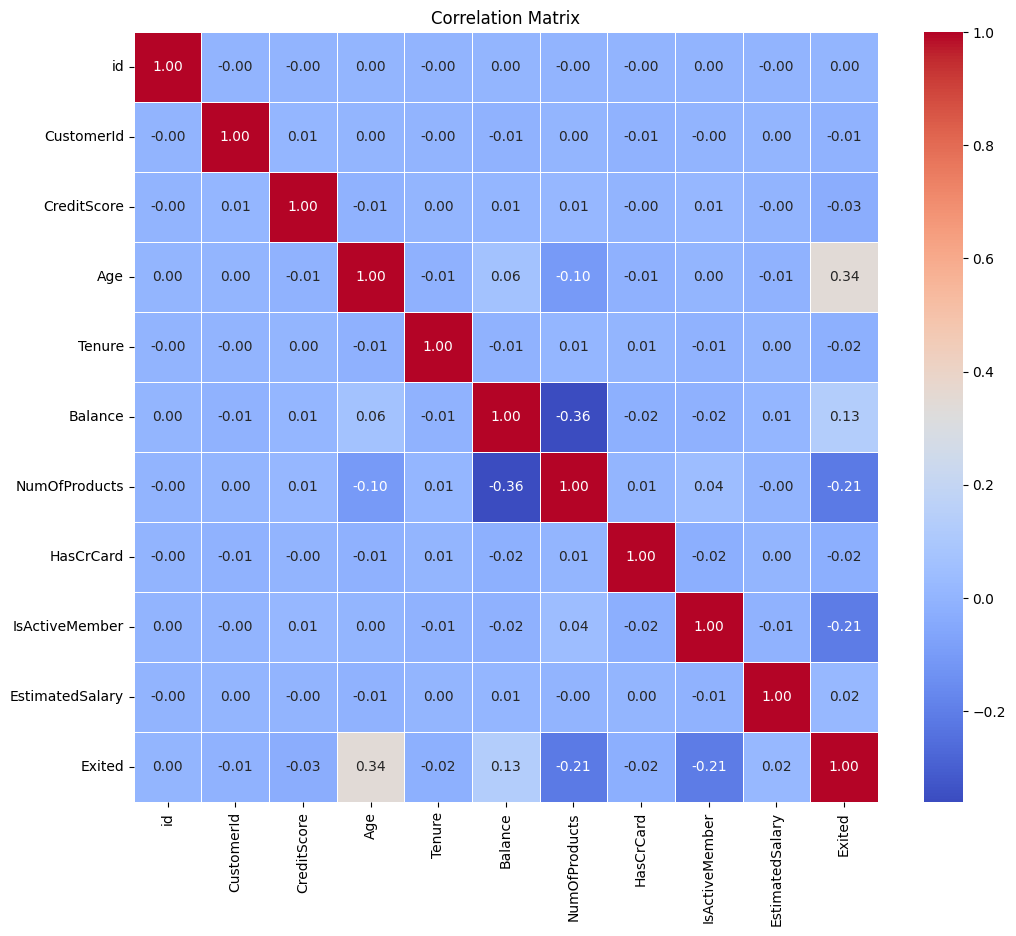

In [11]:
correlation_matrix = train.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-10-876d0f2d2090>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d = train.corr()['Exited'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')


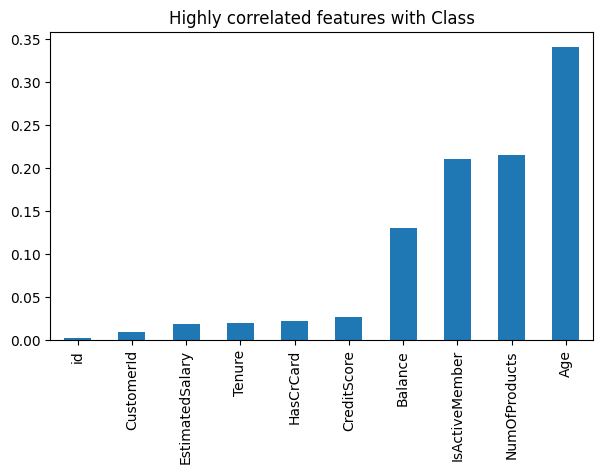

In [10]:
plt.figure(figsize=(7,4))
d = train.corr()['Exited'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

In [34]:
len(train[train['Exited']==1])

34921

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [42]:
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_indices = []

    # iterating over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # appending the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # selecting observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

In [48]:
# detecting outliers
# numeric_columns = train.drop(columns=['id','Exited']).select_dtypes(include='number')
Outliers_IQR = detect_outliers(train,0,['CreditScore','Age','Tenure','Balance','EstimatedSalary'])#,

In [49]:
len(Outliers_IQR)

6634

In [50]:
# dropping outliers
df_out = train.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [51]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158400 entries, 0 to 158399
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               158400 non-null  int64  
 1   CustomerId       158400 non-null  int64  
 2   Surname          158400 non-null  object 
 3   CreditScore      158400 non-null  int64  
 4   Geography        158400 non-null  object 
 5   Gender           158400 non-null  object 
 6   Age              158400 non-null  float64
 7   Tenure           158400 non-null  int64  
 8   Balance          158400 non-null  float64
 9   NumOfProducts    158400 non-null  int64  
 10  HasCrCard        158400 non-null  float64
 11  IsActiveMember   158400 non-null  float64
 12  EstimatedSalary  158400 non-null  float64
 13  Exited           158400 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 16.9+ MB


In [53]:
len(df_out[df_out['Exited']==1])

32415

In [55]:
out = train.loc[train.index[Outliers_IQR]]

In [56]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6634 entries, 35 to 165026
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6634 non-null   int64  
 1   CustomerId       6634 non-null   int64  
 2   Surname          6634 non-null   object 
 3   CreditScore      6634 non-null   int64  
 4   Geography        6634 non-null   object 
 5   Gender           6634 non-null   object 
 6   Age              6634 non-null   float64
 7   Tenure           6634 non-null   int64  
 8   Balance          6634 non-null   float64
 9   NumOfProducts    6634 non-null   int64  
 10  HasCrCard        6634 non-null   float64
 11  IsActiveMember   6634 non-null   float64
 12  EstimatedSalary  6634 non-null   float64
 13  Exited           6634 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 777.4+ KB


In [58]:
len(out[out['Exited']==1])

2506

In [59]:
len(out[out['Exited']==1]) / len(out)

0.377750979801025

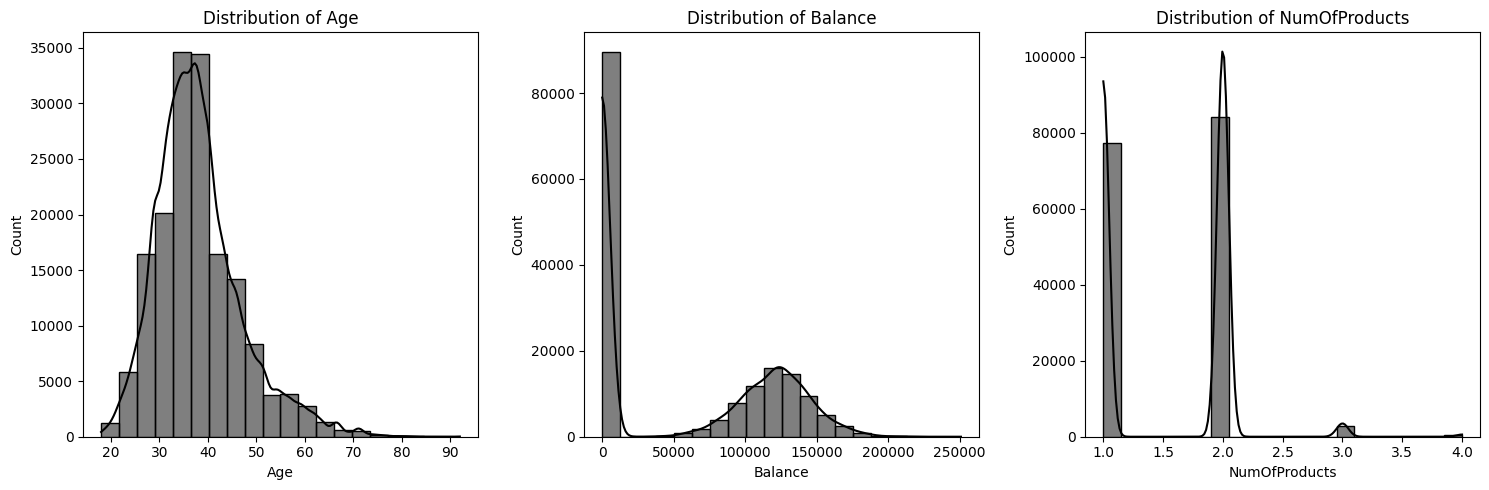

In [71]:
columns_to_visualize = ['Age', 'Balance', 'NumOfProducts']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_visualize), figsize=(15, 5))

# Plot histograms for each column
for i, column in enumerate(columns_to_visualize):
    sns.histplot(train[column], ax=axes[i], kde=True, bins=20, color='black')
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

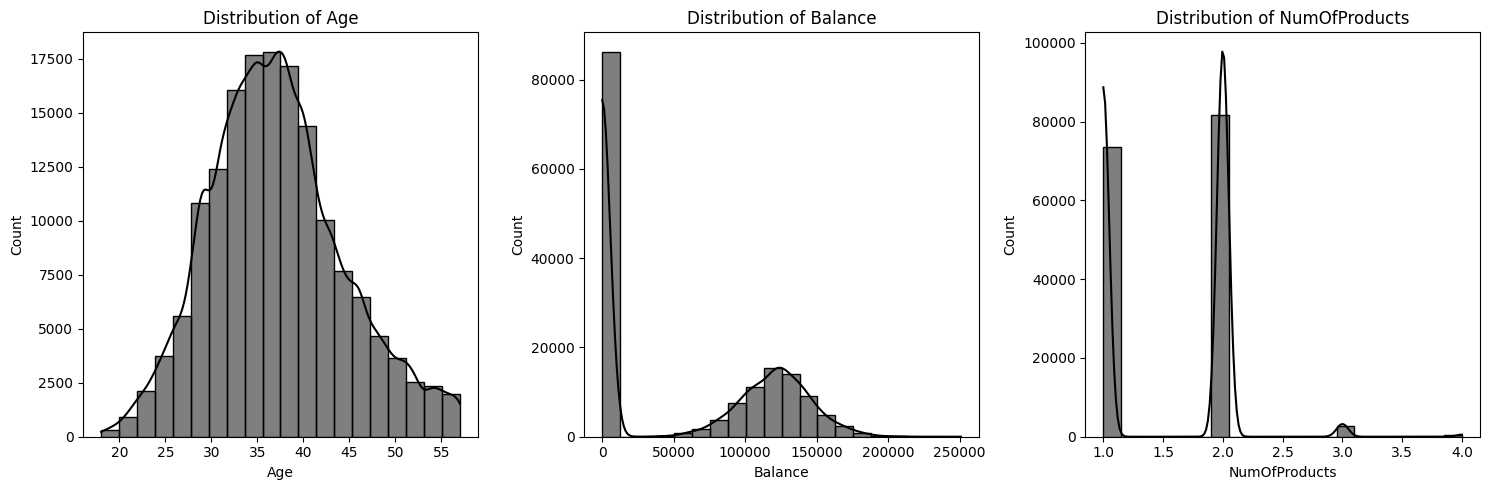

In [72]:
columns_to_visualize = ['Age', 'Balance', 'NumOfProducts']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_visualize), figsize=(15, 5))

# Plot histograms for each column
for i, column in enumerate(columns_to_visualize):
    sns.histplot(df_out[column], ax=axes[i], kde=True, bins=20, color='black')
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [75]:
train[train['Balance']==0]['Exited'].describe()

count    89648.000000
mean         0.161654
std          0.368136
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

In [77]:
train[(train['Balance']==0) & (train['Exited']==1)]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
25,25,15671137,Sazonova,703,Spain,Male,39.0,9,0.0,1,1.0,0.0,131363.57,1
28,28,15794849,Chidubem,785,Spain,Male,41.0,4,0.0,1,1.0,0.0,170968.99,1
55,55,15775116,Tung,634,France,Female,47.0,1,0.0,1,1.0,0.0,73883.56,1
59,59,15579787,Nkemakonam,686,France,Female,45.0,4,0.0,1,1.0,0.0,155023.93,1
65,65,15725882,Nwachukwu,663,France,Female,54.0,6,0.0,1,1.0,1.0,170950.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164988,164988,15592104,Lane,655,France,Male,39.0,5,0.0,1,0.0,0.0,36548.00,1
164989,164989,15641312,Okechukwu,616,Spain,Female,47.0,2,0.0,1,1.0,1.0,94811.46,1
165007,165007,15674851,Gaffney,767,France,Male,38.0,3,0.0,1,1.0,0.0,152872.84,1
165022,165022,15798960,Hao,577,France,Female,45.0,2,0.0,1,0.0,0.0,148811.14,1


In [91]:
from sklearn.preprocessing import LabelEncoder
ordinal_features = ['Surname', 'Geography', 'Gender']

for feature in ordinal_features:
    le = LabelEncoder()
    le = le.fit(train[feature])
    train[feature] = le.transform(train[feature])

    for label in np.unique(test[feature]):
        if label not in le.classes_:
            le.classes_ = np.append(le.classes_, label)
    test[feature] = le.transform(test[feature])

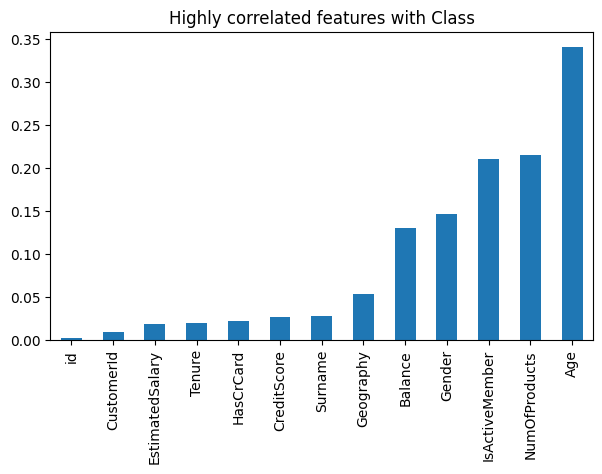

In [92]:
plt.figure(figsize=(7,4))
d = train.corr()['Exited'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

In [80]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [82]:
estimator = []
estimator.append(('Neural Network', MLPClassifier(max_iter = 10000) ))
estimator.append(('LogisticRegression', LogisticRegression(solver ='lbfgs', multi_class ='multinomial', max_iter = 200)))
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier() ))
estimator.append(('RandomForest', RandomForestClassifier() ))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('AdaBoostClassifier', AdaBoostClassifier() ))
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier() ))
estimator.append(('XGB', XGBClassifier() ))
estimator.append(('CatBoost', CatBoostClassifier(logging_level='Silent') ))

In [94]:
X = train.drop(['id','CustomerId','Exited'], axis=1)
y = train['Exited']

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features

    return df

In [ ]:
col_names = numerical_columns
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [ ]:
VC_soft = VotingClassifier(estimators = estimator, voting ='soft')
VC_soft.fit(X_train, y_train)
y_pred = VC_soft.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(VC_soft, X_train, y_train, cv=5, method="predict_proba")
print(y_scores.mean())
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:, 1])
roc_auc = roc_auc_score(y_train, y_scores[:, 1])